In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

data = pd.read_csv('../data/FPT.csv')
data.head()

,Unnamed: 0,time,open,high,low,close,volume,Unnamed: 7
0,0,1/2/2018,17.56,18.33,17.53,18.33,5022160,NaN
1,1,1/3/2018,18.54,18.61,18.24,18.33,2829930,NaN
2,2,1/4/2018,18.39,18.70,18.36,18.70,2784800,NaN
3,3,1/5/2018,18.70,18.73,18.36,18.39,2851450,NaN
4,4,1/8/2018,18.27,18.67,18.18,18.67,2529030,NaN


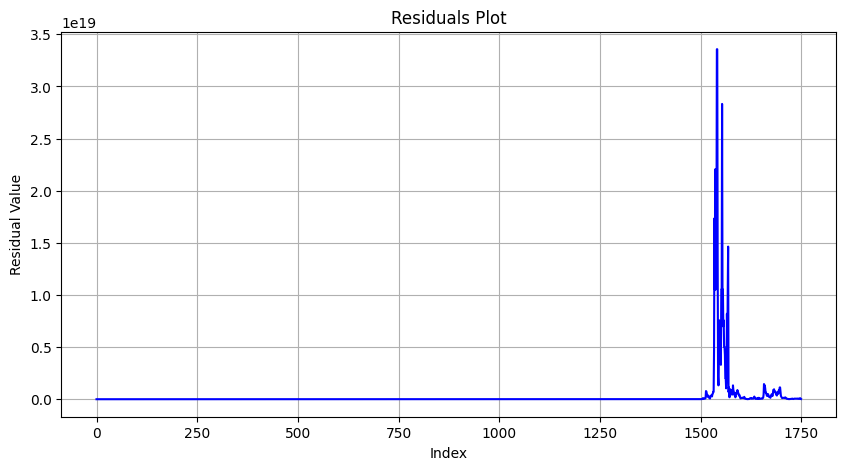

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[:, 0], linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Residual Value")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()

In [3]:
def process_data(data):

    # Chia tập dữ liệu thành train/test (80% train, 20% test)
    x_train, x_test = train_test_split(data[['close']], test_size=0.2, shuffle=False)

    # Khởi tạo scaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit scaler trên tập huấn luyện và transform cả train lẫn test
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)

    #Tạo vòng lặp giá trị, lấy 60 ngày trong quá khứ để dự đoán ngày tiếp theo
    x_train = []
    y_train = []
    for i in range(60, len(train_scaled)):
        x_train.append(train_scaled[i-60:i, 0])
        y_train.append(train_scaled[i, 0])

    x_test = []
    y_test = []
    for i in range(60, len(test_scaled)):
        x_test.append(test_scaled[i-60:i, 0])
        y_test.append(test_scaled[i, 0])

    #Chuyển dạng list sang dạng mảng numpy
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)

    #Xếp dữ liệu thành mảng 1 chiều
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_train, y_train, x_test, y_test, scaler, test_scaled

In [4]:
x_train, y_train, x_test, y_test, scaler, test_scaled = process_data(data)

In [ ]:
from tensorflow import keras

#create model
def create_gru(units, dropout):
    model = Sequential()
    model.add(GRU (units = units, return_sequences = True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(dropout))
    model.add(GRU(units = units))
    model.add(Dropout(dropout))
    model.add(Dense(units = 1))
    model.compile(optimizer='adam',loss='mse')
    return model

In [6]:
#Fit the models

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(x_train, y_train, epochs = 100,
                        validation_split = 0.2,
                        batch_size = 64, shuffle = False,
                        callbacks = [early_stop])
    return history

In [ ]:
#FPT
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0313 - val_loss: 0.0058
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0163 - val_loss: 0.0233
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0312 - val_loss: 0.0252
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0102 - val_loss: 9.0394e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0026 - val_loss: 4.8780e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0035 - val_loss: 5.4742e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0030 - val_loss: 3.2961e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━

In [ ]:
#MSFT
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0211 - val_loss: 0.0363
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0244 - val_loss: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0076 - val_loss: 0.0157
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0108 - val_loss: 0.0043
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0021 - val_loss: 6.7004e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 9.0264e-04 - val_loss: 0.0011
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0012 - val_loss: 6.6178e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 9.2044e-04 - val_loss: 9.4113e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━

In [ ]:
# BID
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 0.0434 - val_loss: 0.0197
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0095 - val_loss: 0.0022
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0110 - val_loss: 0.0012
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#HPG
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0195 - val_loss: 0.0362
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0354 - val_loss: 0.0020
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0111 - val_loss: 0.0029
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0106 - val_loss: 0.0022
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0112 - val_loss: 0.0015
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step

In [ ]:
#MWG
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0054 - val_loss: 0.0233
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0131 - val_loss: 0.0034
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0059 - val_loss: 0.0120
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0138 - val_loss: 0.0028
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0026 - val_loss: 0.0057
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#VCB
model_gru = create_gru(64, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0045 - val_loss: 0.0059
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0072 - val_loss: 0.0028
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0122 - val_loss: 0.0032
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0014 - val_loss: 7.8819e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0013 - val_loss: 6.9273e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0011 - val_loss: 7.3041e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
predict = model_gru.predict(x_test)
prediction_test_price = scaler.inverse_transform(predict)
actual_test_price = scaler.inverse_transform(y_test.reshape(-1, 1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


In [ ]:
model_gru.save('../model/GRU-MWG.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics

model_gru = load_model('../model/GRU-FPT.h5', custom_objects={'mse': metrics.MeanSquaredError()})

In [ ]:
#Tính toán các chỉ số đánh giá # FPT
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.04552625175454401
MAE:  0.033618913701040205
R-squared:  0.9867488290041618


In [ ]:
#Tính toán các chỉ số đánh giá # MSFT
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.038020697559411884
MAE:  0.03244709160745163
R-squared:  0.8117474565910165


In [ ]:
#Tính toán các chỉ số đánh giá # BID
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.04172382400246135
MAE:  0.03553401087849817
R-squared:  0.8901521706884854


In [ ]:
#Tính toán các chỉ số đánh giá # VCB
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.023305689874506572
MAE:  0.01928974665298852
R-squared:  0.8063904656838834


In [ ]:
#Tính toán các chỉ số đánh giá # HPG
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.019755530081011108
MAE:  0.016384770815977695
R-squared:  0.7928290454426156


In [ ]:
#Tính toán các chỉ số đánh giá # MWG
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.049479514127419945
MAE:  0.04480660333322301
R-squared:  0.9129601252274655


In [30]:
dataa = pd.DataFrame({'Actual': actual_test_price.flatten(), 'Predicted': prediction_test_price.flatten()})
print(dataa)

           Actual     Predicted
0    6.813997e+12  5.558430e+12
1    1.428170e+13  5.054479e+12
2    9.478053e+12  9.106333e+12
3    8.239823e+12  8.371070e+12
4    2.378319e+13  7.048796e+12
..            ...           ...
295  6.102134e+16  8.102828e+15
296  8.659340e+16  1.801012e+16
297  1.006072e+17  1.721960e+16
298  4.090383e+16  1.736187e+16
299  2.031224e+16  6.886105e+15

[300 rows x 2 columns]


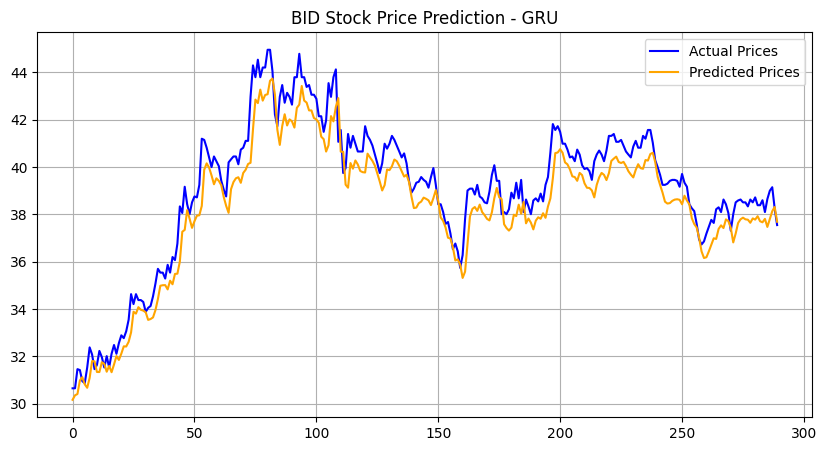

In [10]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('BID Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

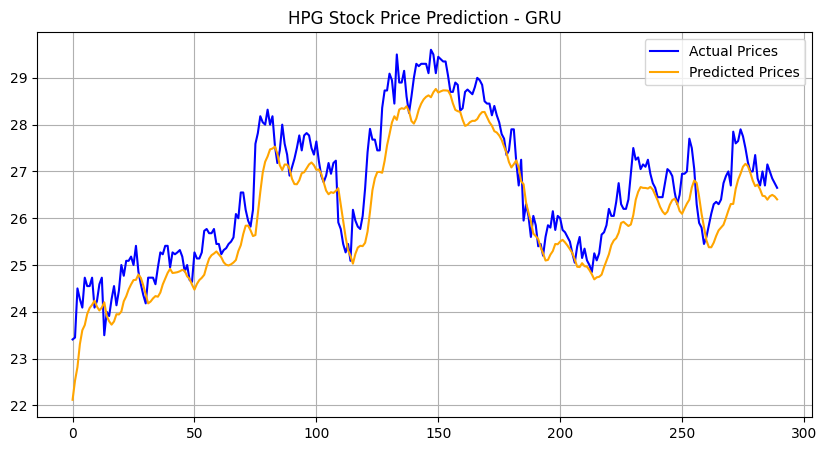

In [56]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('HPG Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

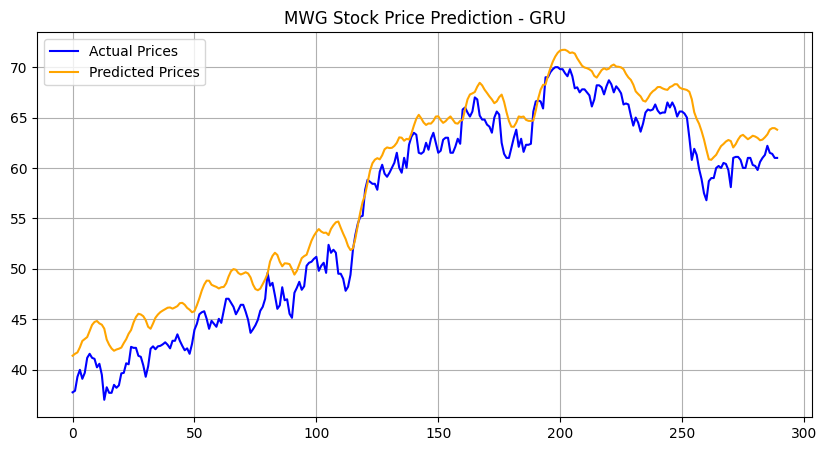

In [24]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('MWG Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

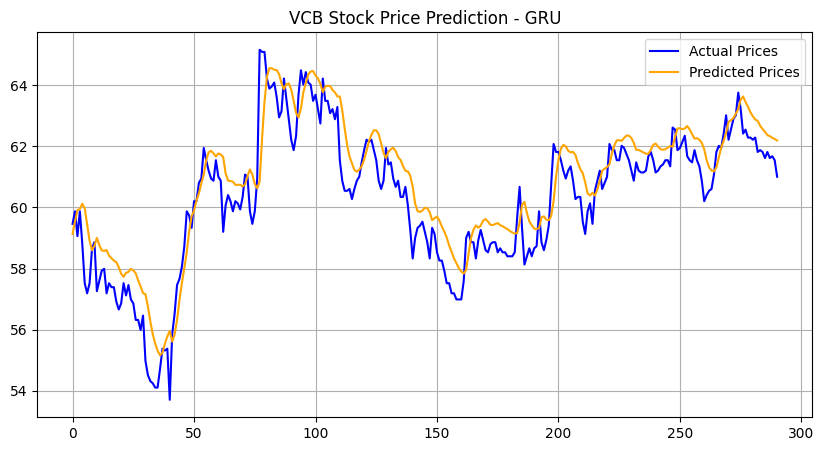

In [50]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('VCB Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

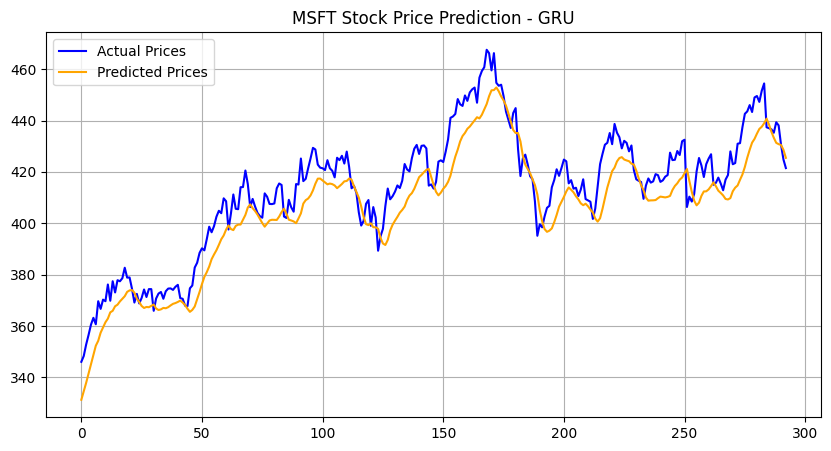

In [70]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('MSFT Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

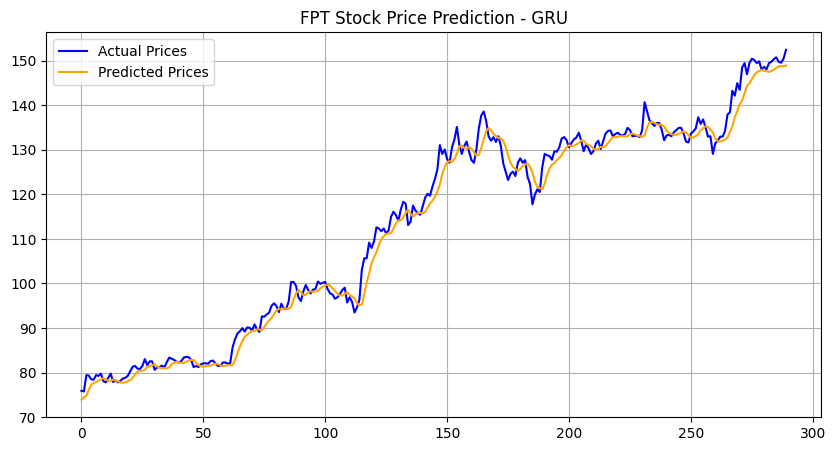

In [9]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('FPT Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()